In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Loading Data

In [3]:
data = pd.read_csv('Ames_Housing_Data.csv')

# Preprocessing Data

In [4]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [35]:
data.shape

(2793, 82)

In [5]:
data.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [34]:
data.isna()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,LogSalePrice
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
2926,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,False
2927,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2928,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False


In [7]:
missing_values = data.isnull().sum()
print(missing_values)

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64


In [9]:
# Filling Null Values
data['Lot Frontage'].fillna(value=data['Lot Frontage'].mean(), inplace=True)

In [10]:
missing_values = data.isnull().sum()
print(missing_values)

PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 81, dtype: int64


In [13]:
data.dtypes

PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 81, dtype: object

# Data Formatting and Data Normalization

In [37]:
# Replacinf Categorical Data to Quantitative Data
data['Alley'].unique()

data['Alley'].fillna(-1, inplace=True)
data['Alley'].replace(to_replace=-1, value=0, inplace=True)
data['Alley'].replace(to_replace='Pave', value=1, inplace=True)
data['Alley'].replace(to_replace='Grvl', value=2, inplace=True)

data['Alley'].unique()

[0 1 2]


array([0, 1, 2], dtype=int64)

In [18]:
data['Alley'].dtype

dtype('int64')

In [19]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,0,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,0,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,0,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,0,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,0,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [20]:
data['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [21]:
data['Street'].dtype

dtype('O')

In [22]:
data['Street'].replace(to_replace='Pave', value=0, inplace=True)
data['Street'].replace(to_replace='Grvl', value=1, inplace=True)

In [23]:
data['Street'].unique()

array([0, 1], dtype=int64)

In [24]:
data['Street'].dtype

dtype('int64')

In [25]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,0,0,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,0,0,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,0,0,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,0,0,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,0,0,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Data Visualization

(array([ 146., 1333.,  908.,  329.,  134.,   51.,   14.,    9.,    4.,
           2.]),
 array([ 12789. ,  87010.1, 161231.2, 235452.3, 309673.4, 383894.5,
        458115.6, 532336.7, 606557.8, 680778.9, 755000. ]),
 <BarContainer object of 10 artists>)

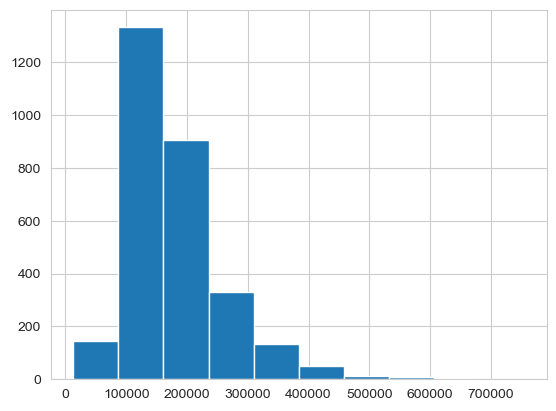

In [26]:
sns.set_style('whitegrid')
plt.hist(data['SalePrice'])

In [27]:
data['SalePrice'].mean()

180796.0600682594

# Data Normalised

In [28]:
min_value = data['SalePrice'].min()
max_value = data['SalePrice'].max()

print(min_value)
print(max_value)

12789
755000


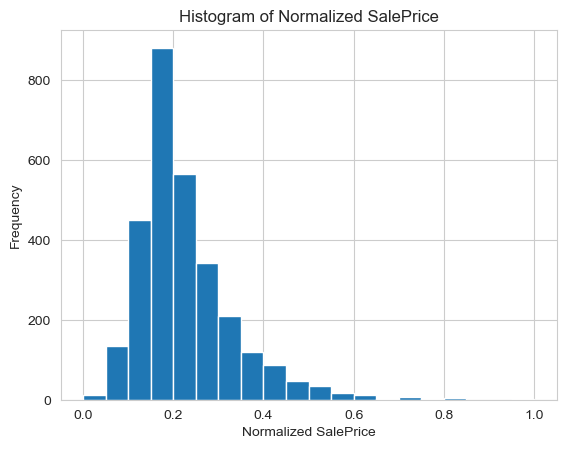

In [29]:
# MinMax Scaler Normalization

salePrice = data['SalePrice'].values.reshape(-1, 1)

scaler = MinMaxScaler()

normalizedData = scaler.fit_transform(salePrice)

sns.set_style('whitegrid')
plt.hist(normalizedData, bins=20)  
plt.xlabel('Normalized SalePrice')
plt.ylabel('Frequency')
plt.title('Histogram of Normalized SalePrice')
plt.show()

In [30]:
print("Min normalized value:", normalizedData.min())
print("Max normalized value:", normalizedData.max())

Min normalized value: 0.0
Max normalized value: 1.0


(array([ 11., 135., 451., 882., 565., 343., 210., 119.,  88.,  46.,  35.,
         16.,  11.,   3.,   6.,   3.,   4.,   0.,   0.,   2.]),
 array([ 12789.  ,  49899.55,  87010.1 , 124120.65, 161231.2 , 198341.75,
        235452.3 , 272562.85, 309673.4 , 346783.95, 383894.5 , 421005.05,
        458115.6 , 495226.15, 532336.7 , 569447.25, 606557.8 , 643668.35,
        680778.9 , 717889.45, 755000.  ]),
 <BarContainer object of 20 artists>)

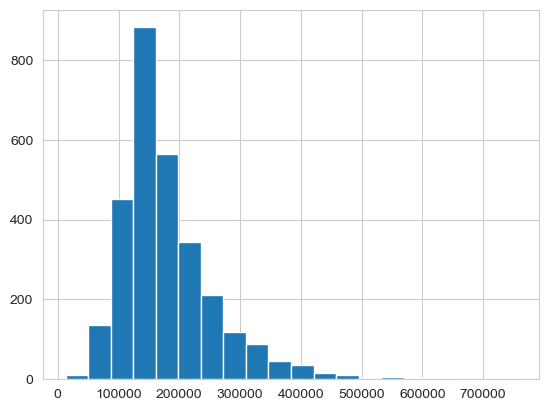

In [31]:
plt.hist(data['SalePrice'], bins=20)

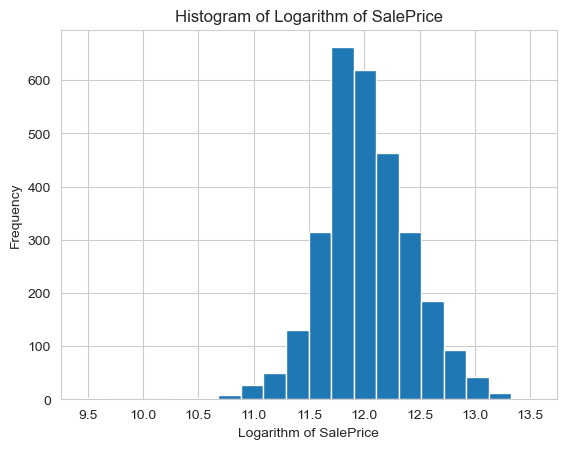

In [32]:
# Logarithmic Normalization

data['LogSalePrice'] = np.log1p(data['SalePrice'])


sns.set_style('whitegrid')
plt.hist(data['LogSalePrice'], bins=20) 
plt.xlabel('Logarithm of SalePrice')
plt.ylabel('Frequency')
plt.title('Histogram of Logarithm of SalePrice')
plt.show()

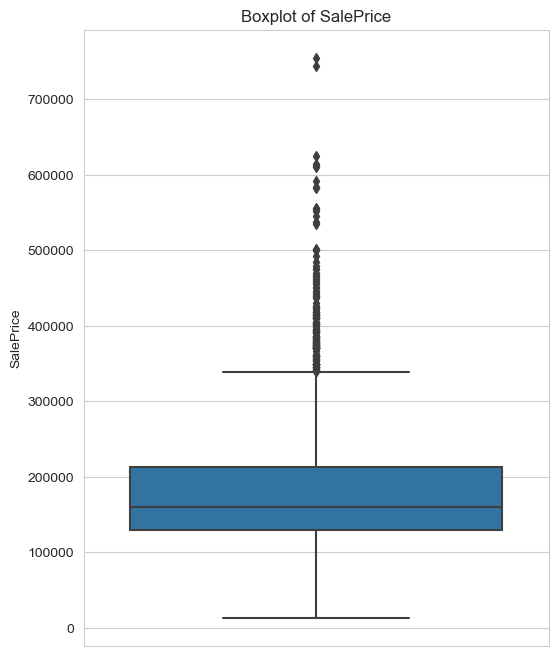

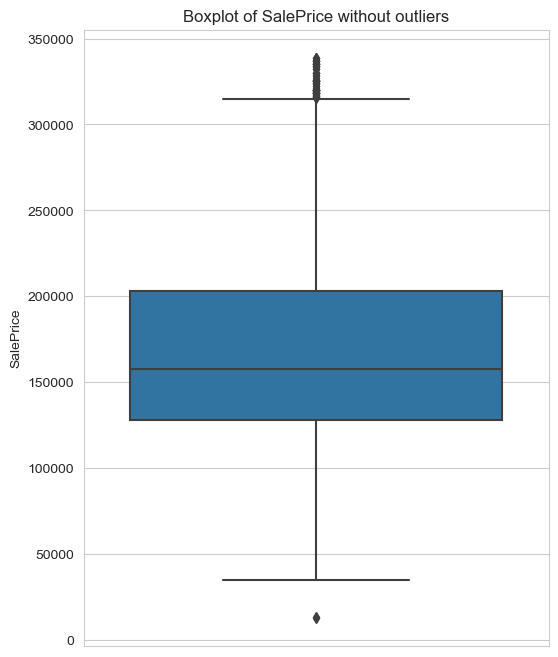

In [33]:
# IQR Method of Removing Outliers

plt.figure(figsize=(6, 8))
sns.boxplot(y=data['SalePrice'])
plt.ylabel('SalePrice')
plt.title('Boxplot of SalePrice')
plt.show()

# Calculate IQR
Q1 = data['SalePrice'].quantile(0.25)
Q3 = data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Define limits to identify outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['SalePrice'] >= lower_limit) & (data['SalePrice'] <= upper_limit)]

# Create a boxplot again without outliers
plt.figure(figsize=(6, 8))
sns.boxplot(y=data['SalePrice'])
plt.ylabel('SalePrice')
plt.title('Boxplot of SalePrice without outliers')
plt.show()